## Part 1
### Potential, kinetic, and total energy plotting.
### 1. Run the gromacs first and load relevant energy files.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [20]:
# load relevant energy files and check several rows and the shapes of them.
# total energy

total = pd.read_csv('Total-En.xvg', delim_whitespace=True, names=["Time","Total"], comment='#')
total.head()

,Time,Total
0,0.000,4.506824
1,0.005,4.506823
2,0.010,4.506824
3,0.015,4.506823
4,0.020,4.506823


In [21]:
total.tail()

,Time,Total
199996,999.980,4.501198
199997,999.985,4.501198
199998,999.990,4.501198
199999,999.995,4.501197
200000,1000.000,4.501198


In [22]:
total.shape

(200001, 2)

In [23]:
# potential energy

potential = pd.read_csv('Potential.xvg', delim_whitespace=True, names=["Time", "Potential"], comment='#')
potential.head()

,Time,Potential
0,0.000,-0.674165
1,0.005,-0.679956
2,0.010,-0.685780
3,0.015,-0.691641
4,0.020,-0.697533


In [24]:
potential.tail()

,Time,Potential
199996,999.980,-0.038195
199997,999.985,-0.038519
199998,999.990,-0.038845
199999,999.995,-0.039173
200000,1000.000,-0.039502


In [25]:
potential.shape

(200001, 2)

In [26]:
# kinetic energy

kinetic = pd.read_csv("Kinetic.xvg", delim_whitespace=True, names=["Time", "Kinetic"], comment="#")
kinetic.head()

,Time,Kinetic
0,0.000,5.180988
1,0.005,5.186779
2,0.010,5.192605
3,0.015,5.198463
4,0.020,5.204356


In [27]:
kinetic.tail()

,Time,Kinetic
199996,999.980,4.539393
199997,999.985,4.539717
199998,999.990,4.540043
199999,999.995,4.540370
200000,1000.000,4.540700


In [28]:
kinetic.shape

(200001, 2)

### 2. Make plots

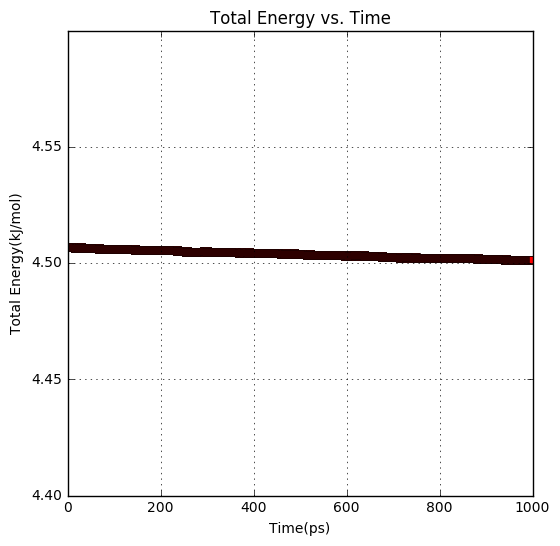

In [29]:
# make plots and compare them, showing that total energy remains constant while potential
# and kinetic energy fluctuate

# total energy vs. time

fig = plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 10})

axes = fig.add_subplot(111)
axes.plot(total.Time[::], total.Total[::], 'rs')
axes.set_ylim([4.4, 4.6])
axes.set_ylabel('Total Energy(kJ/mol)')
axes.set_xlabel('Time(ps)')
axes.set_title('Total Energy vs. Time')
axes.grid()


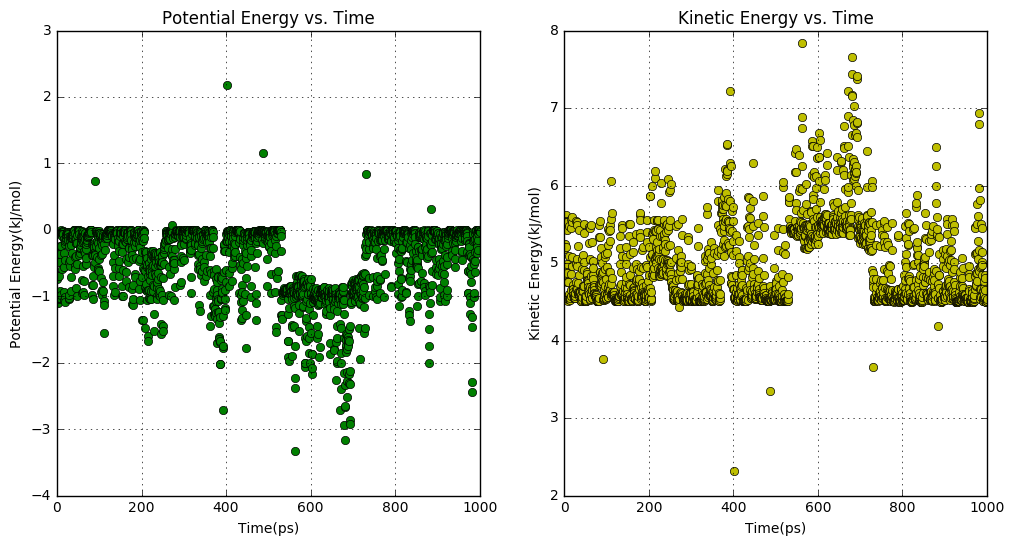

In [30]:
# potential energy vs. time & kinetic energy vs. time

fig = plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 10})

axes = fig.add_subplot(121)
axes.plot(potential.Time[::100],potential.Potential[::100],marker='o',c='g',ls='')
axes.set_ylabel('Potential Energy(kJ/mol)')
axes.set_xlabel('Time(ps)')
axes.set_title('Potential Energy vs. Time')
axes.grid()

axes = fig.add_subplot(122)
axes.plot(kinetic.Time[::100],kinetic.Kinetic[::100],marker='o',c='y',ls='')
axes.set_ylabel('Kinetic Energy(kJ/mol)')
axes.set_xlabel('Time(ps)')
axes.set_title('Kinetic Energy vs. Time')
axes.grid()

## Part 2
### total energy drift vs. parameters  
### 1. Identify parameters.
* After manipulating several parameters in inputs.mdp file, time *** step size (dt)***, *** temperature*** and*** LJ cut-off distance (rvdw)*** have been confirmed relevant. 

In [31]:
drift = pd.read_csv("Drift", delim_whitespace=True, names=["dt", "Total_1", "Potential_1", "rvdw", "Total_2", "Potential_2", "temp", "Total_3", "Potential_3"])
drift

,dt,Total_1,Potential_1,rvdw,Total_2,Potential_2,temp,Total_3,Potential_3
0,0.0001,-0.000878,0.206827,0.6,-0.054318,0.010670,100,-0.005552,-0.193849
1,0.0005,-0.005552,-0.193849,0.8,-0.013015,-0.126859,200,-0.011350,-0.088541
2,0.0050,-0.046998,-0.064883,1.0,-0.005552,-0.193849,500,-0.027318,-0.005031
3,0.0100,-0.115457,0.079907,1.1,-0.003056,0.042356,800,-0.051606,-0.016493
4,0.0500,-0.547443,-0.111768,1.2,-0.001378,-0.040755,1000,-0.054727,0.047318


### 2. Make plots.
* From the plots we can see that total energy drift indeed changes a lot with dt/rvdw modified. However, I don't think the plot of "Total Energy Drift vs. parameters" itself can accurately illustrate whether the significant drift occurs under which situation.
* Since we define it as ** an insignificant drift when it is two orders of magnitude smaller than drift in potential energy, as the above table shows**.
* In my view, therefore, we can make plots by calculating the relative value of total drift and potential drift and then setting it as the dependent variable of the parameter.

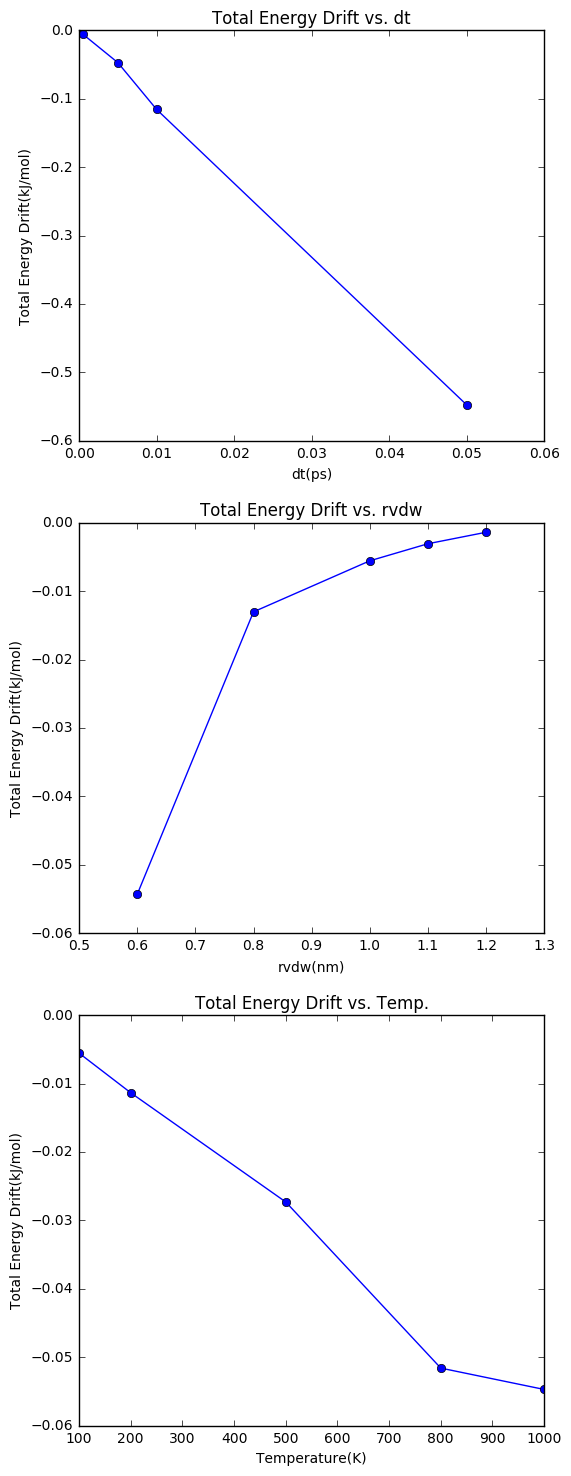

In [32]:
fig = plt.figure(figsize=(6, 18))

plt.subplot(311)             # the first subplot in the figure
plt.xlabel("dt(ps)")
plt.ylabel("Total Energy Drift(kJ/mol)")
plt.title("Total Energy Drift vs. dt")
plt.plot(drift.dt, drift.Total_1, marker="o")

plt.subplot(312)             # the second subplot in the figure
plt.xlabel("rvdw(nm)")
plt.ylabel("Total Energy Drift(kJ/mol)")
plt.title("Total Energy Drift vs. rvdw")
plt.plot(drift.rvdw, drift.Total_2, marker="o")

plt.subplot(313)             # the third subplot in the figure
plt.xlabel("Temperature(K)")
plt.ylabel("Total Energy Drift(kJ/mol)")
plt.title("Total Energy Drift vs. Temp.")
plt.plot(drift.temp, drift.Total_3, marker="o")


plt.show()

### As is shown in both the table and the plots, 
* the smaller time steps (e.g. 0.0001ps, 0.0005ps) are reasonable for this simulation as the total drifts of them are two orders of magnitudes smaller than the potential drifts.
* only cut-off distance around 1.0nm is reasonable for this simulation due to the same reason.

## 3. Guesses and explanations
 * larger time steps tend to introduce major inaccuracy in numerical integration (we use integral under the condition of approximate infinite time steps where the average value and the instantaneous value are close enough).
### Q: disadvantages of too small dt? the speed and the cost of computation?...


 * cuf-off distance is utilized to focus on the most relevant parts by overlooking the relatively irrelevant interactions, which means it is important to select a reasonable one. If not, an abrupt rvdw would result in discontinuity at the cutoff. Energy is, consequently, not conserved in NVE if the potential energy is not continuous and differentiable.
### Q: why the absolute value of total energy drift is decreasing?
### Q: more details for this reasoning?
### Q: the 1st or 2nd derivative of potential be continuous at the boundary?

### Other guess:  
* algorithem - "integrator" (Verlet algorithm right now)

## 4. Problems I have met
 * when I set dt as more than 0.5ps with the original nsteps=2000000, gromacs stuck for a long time and crashed without any output at last.
 * when I changed rvdw as rcoulomb unchanged, there was an error message that “With Verlet lists rcoulomb!=rvdw is not supported”. I'm confused since our system is made up of 5 argons which with neither partial charge or electrostatic interaction. So why should I modify rcoulomb either? Is it just because of using Verlet? 
 * when I added rvdw to beyond 1.25, I got another error notice that "The cut-off length is longer than half the shortest box vector or longer than the smallest box diagonal element." After googling I figured out that we got our box vector in "conf.gro" file which is 2.5nm. Thus I cannot set rvdw as more than half of it.